In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [4]:
movie_data = pd.read_csv('TMBD Movie Dataset.csv')

We will be using profit and popularity as the main factors of success

In [5]:
profit = pd.DataFrame(movie_data['profit'])
popularity = pd.DataFrame(movie_data['popularity'])

We have filtered out the factors that we identified to have relevance to the success of a movie 

In [6]:
budget = pd.DataFrame(movie_data['budget'])
cast = pd.DataFrame(movie_data['cast'])
director = pd.DataFrame(movie_data['director'])
genres = pd.DataFrame(movie_data['genres'])
runtime = pd.DataFrame(movie_data['runtime'])
production_companies = pd.DataFrame(movie_data['production_companies'])
release_year = pd.DataFrame(movie_data['release_year'])
release_date = pd.DataFrame(movie_data['release_date'])
allfactors = movie_data[['budget', 'cast', 'director', 'genres', 'production_companies', 'release_year', 'release_date', 'runtime', 'popularity', 'profit']]

In [7]:
allfactors.dropna()
allfactors = allfactors.reset_index(drop=True)
print(f"The shape of the new dataset: {allfactors.shape}")

#check for NULL values in entire dataframe
allfactors.isnull().values.any()

The shape of the new dataset: (1287, 10)


False

In [8]:
allfactors[['year', 'month', 'day']] = allfactors['release_date'].str.split('-', expand=True)
allfactors.drop(['year', 'day'], axis=1, inplace=True)
factors = allfactors[['budget', 'cast', 'director', 'genres', 'production_companies', 'release_year', 'release_date', 'runtime', 'month']]
success = allfactors[['popularity', 'profit']]

In [9]:
allfactors["cast"] = allfactors["cast"].str.split("|")
allfactors = allfactors.explode("cast")
allfactors["director"] = allfactors["director"].str.split("|")
allfactors = allfactors.explode("director")
allfactors

,budget,cast,director,genres,production_companies,release_year,release_date,runtime,popularity,profit,month
0,150000000.0,Chris Pratt,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Bryce Dallas Howard,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Irrfan Khan,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Vincent D'Onofrio,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Nick Robinson,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
...,...,...,...,...,...,...,...,...,...,...,...
1286,2700000.0,John Belushi,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,Tim Matheson,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,John Vernon,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,Verna Bloom,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07


In [10]:
def encodetable(y, separator): 
    options_list = []
    
    # iterate through data and find all available options
    for val in y:
        options = str(val).split(separator)
        options_list.append(options)
    
    # options_list is a list of list containing the avialable options
    # convert to single non-nested list &
    # convert that to set and back to list to remove redundant options
    options = list(set([val for option in options_list for val in option]))
    
    # sort the list so the DataFrame columns are sorted
    options.sort()
    
    # create an empty DataFrame with shape (len(y), len(options))
    df = pd.DataFrame(index=range(len(y)), columns=options)
    
    # intialize all values to 0
    for col in df.columns:
        df[col].values[:] = 0
    
    # set value to 1 if the option was selected
    for index, vals in enumerate(y):
        options = str(vals).split(separator)
        for val in options:
            df.at[index, val] = 1
    return df

In [11]:
encodetable(factors['genres'], '|')

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1283,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1284,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1285,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Step 2: Basic visualisation

In this section, we will perform data visualisation on the numeric and categorical variables within the dataset. This helps us better understand their breakdowns and sets us up for machine learning.

<Axes: >

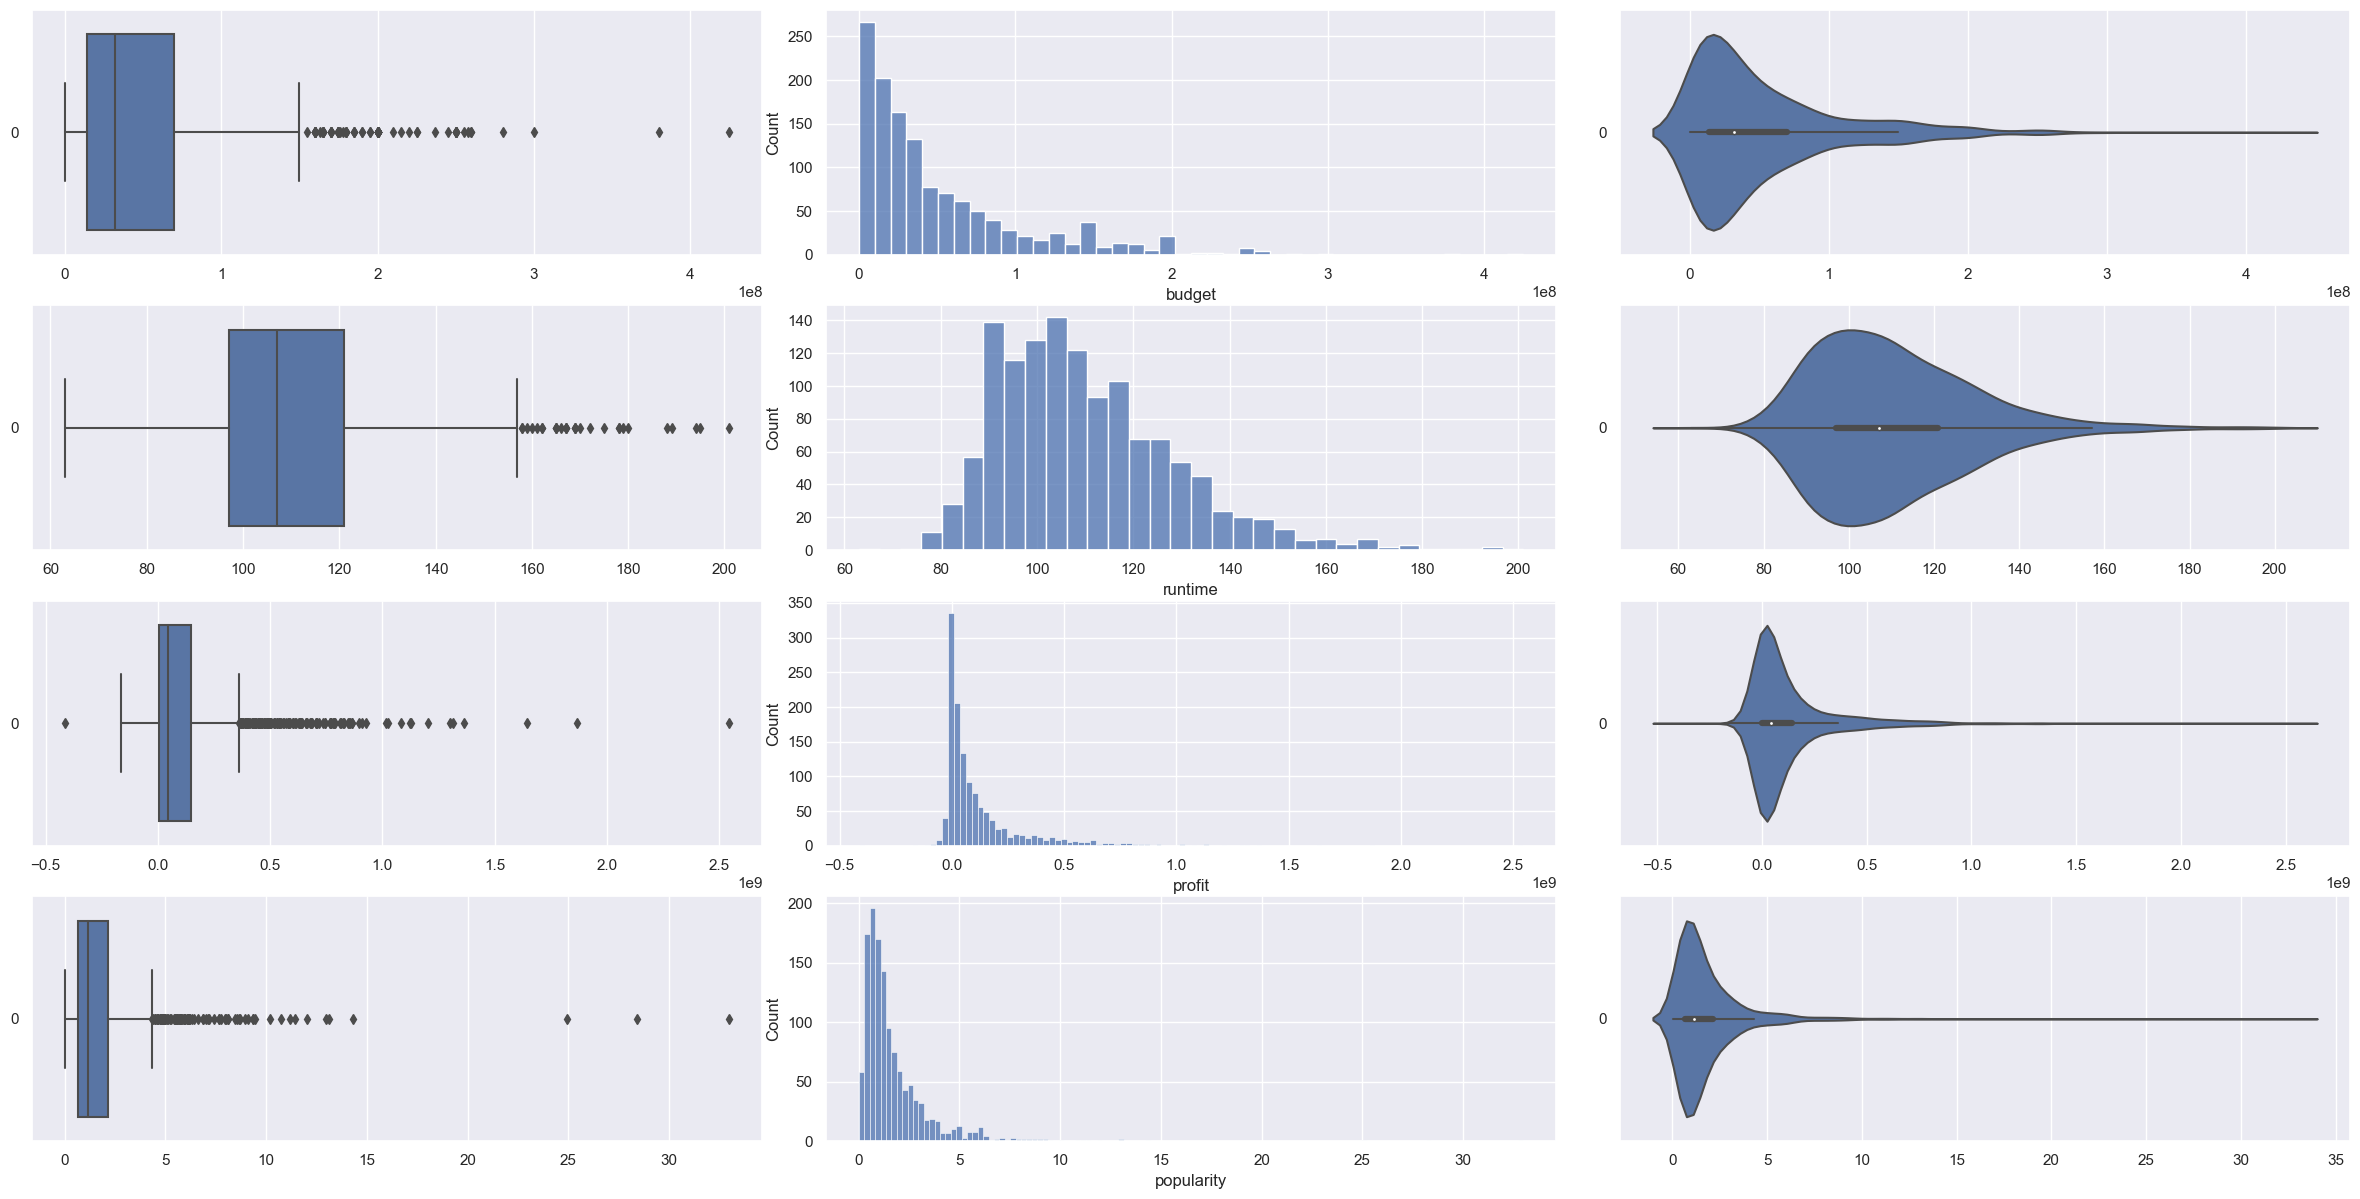

In [14]:
#large numeric data

f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Format the layout so that no overlapping between titles and graphs
plt.tight_layout()

# Budget
sb.boxplot(data = factors["budget"], orient = "h", ax = axes[0,0])
sb.histplot(data = factors["budget"], ax = axes[0,1])
sb.violinplot(data = factors["budget"], orient = "h", ax = axes[0,2])


# Runtime
sb.boxplot(data = factors["runtime"], orient = "h", ax = axes[1,0])
sb.histplot(data = factors["runtime"], ax = axes[1,1])
sb.violinplot(data = factors["runtime"], orient = "h", ax = axes[1,2])



# Profit
sb.boxplot(data = success["profit"], orient = "h", ax = axes[2,0])
sb.histplot(data = success["profit"], ax = axes[2,1])
sb.violinplot(data = success["profit"], orient = "h", ax = axes[2,2])



# Popularity
sb.boxplot(data = success["popularity"], orient = "h", ax = axes[3,0])
sb.histplot(data = success["popularity"], ax = axes[3,1])
sb.violinplot(data = success["popularity"], orient = "h", ax = axes[3,2])